Name & Student Number: ▪ Ryan Alexander – 1827474 ▪ Xin Nian – 1760829 ▪ Kineta Padiachee – 1853416 ▪ Bianco Van Der Ross – 1827456

Please not this is used as a proof of concept using the existing multinomialnb library from skLearn.It is used as a performance bench mark against our Naives bayes made from scratch

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
import sklearn.naive_bayes as nb
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('StackOverflow-Dataset.csv',delimiter = ';')

df[['title', 'label']].tail()

,title,label
13933,Is there any way I can loop this?,javascript
13934,Stripe Connect | Account id safe to expose?,javascript
13935,Handling multiple offers from different peers ...,javascript
13936,"PIXI.JS Newbie, looking for advice and trouble...",javascript
13937,How to make sticky section with horizontal scr...,javascript


In [4]:
df[['title', 'label']].head()


,title,label
0,Using entries from other kivy classes,python
1,Package python software with pylucene dependency,python
2,Extracting time with regex from a string,python
3,How do I add specific headers before each form...,python
4,Barplot from a dataframe using a column to set...,python


In [9]:
df['pred'] = df['label'].apply(lambda x:0 if x=='python' else 1)

In [10]:
df[['title', 'label','pred']].tail()

,title,label,pred
13933,Is there any way I can loop this?,javascript,1
13934,Stripe Connect | Account id safe to expose?,javascript,1
13935,Handling multiple offers from different peers ...,javascript,1
13936,"PIXI.JS Newbie, looking for advice and trouble...",javascript,1
13937,How to make sticky section with horizontal scr...,javascript,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['pred'], random_state=1)

In [13]:
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [14]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [15]:
print('Accuracy score: ', accuracy_score(y_test, predictions))
print("Precision Score : ",precision_score(y_test, predictions,average='macro'))
print("Recall Score : ",recall_score(y_test, predictions,average='macro'))

Accuracy score:  0.8992826398852224
Precision Score :  0.8987775162866826
Recall Score :  0.8991690479622236


Text(91.68, 0.5, 'predicted label')

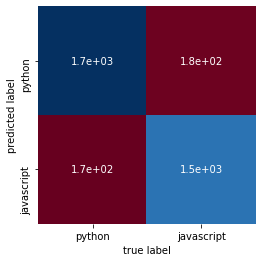

In [17]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['python', 'javascript'], yticklabels=['python','javascript'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [18]:
testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append('javaScript')
    else:
        testing_predictions.append('python')
        
check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'title':list(X_test)})
check_df.replace(to_replace=0, value='python', inplace=True)
check_df.replace(to_replace=1, value='java', inplace=True)
check_df.replace(to_replace=2, value='php', inplace=True)
check_df.replace(to_replace=3, value='R', inplace=True)
check_df.replace(to_replace=4, value='javascript', inplace=True)

In [19]:
check_df[['actual_label', 'prediction','title']]

,actual_label,prediction,title
0,java,javaScript,Destructuring and Flow
1,java,javaScript,How to add DOM elements instantly from inside ...
2,python,python,Django - update ForeignKey when new object is ...
3,python,python,Read csv and save only structure
4,python,javaScript,post request returning an error wtforms flask_...
...,...,...,...
3480,python,python,"Python while loop runs, but incorrect use of i..."
3481,java,javaScript,Class Names in contenteditable text divs
3482,java,javaScript,can i assign json keys to css classes in order...
3483,python,python,Problem installing scikit-image probably due t...
